In [24]:
import sys
import os
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from XCrystal import *
import time

In [25]:
Npoints = 40
delta_theta = 15e-6
omega0 = 9831
domegas = np.linspace(-1e-5,1e-5 , Npoints)  
omegas = omega0*(1+ domegas) 

Rs = np.zeros(Npoints)
Ts = np.zeros(Npoints)

In [26]:
def single_realization(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_ThermalBump3.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission

def single_realization_with_data(delta_theta, omega):
    
    xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_ThermalBump3.yaml', omega)
    xcr.configure(delta_theta)
    xcr.run3D()
    
    return xcr.Reflectivity, xcr.Transmission, xcr.U1_field, xcr.U2_field

In [27]:
U1_data = []
U2_data = []

for i in range(0, Npoints):
    Rs[i], Ts[i], U1_xyz, U2_xyz = single_realization_with_data(delta_theta, omegas[i])
    U1_data.append(U1_xyz)
    U2_data.append(U2_xyz)

U1_xyz = np.asarray(U1_data)
U2_xyz = np.asarray(U2_data)

Delta theta:  1.5e-05 ; Reflectivity:  0.016329907721064827 ; Transmission:  0.9825533538599551 PhaseRefl 0.605640705693973
Delta theta:  1.5e-05 ; Reflectivity:  0.016394508689590335 ; Transmission:  0.9824873597572861 PhaseRefl 2.4150189217906974
Delta theta:  1.5e-05 ; Reflectivity:  0.01645580473006216 ; Transmission:  0.9824246581191532 PhaseRefl -2.058795556707424
Delta theta:  1.5e-05 ; Reflectivity:  0.016513765910061973 ; Transmission:  0.982365279380847 PhaseRefl -0.2494321719142245
Delta theta:  1.5e-05 ; Reflectivity:  0.016568363899487033 ; Transmission:  0.9823092523820435 PhaseRefl 1.5599237772683363
Delta theta:  1.5e-05 ; Reflectivity:  0.016619572006869227 ; Transmission:  0.982256604330716 PhaseRefl -2.9139130283947527
Delta theta:  1.5e-05 ; Reflectivity:  0.016667365179366043 ; Transmission:  0.9822073608021983 PhaseRefl -1.1045720633774458
Delta theta:  1.5e-05 ; Reflectivity:  0.016711720032618373 ; Transmission:  0.9821615457090064 PhaseRefl 0.7047609158702822
D

In [28]:
U2_xyz.shape

Mj=100

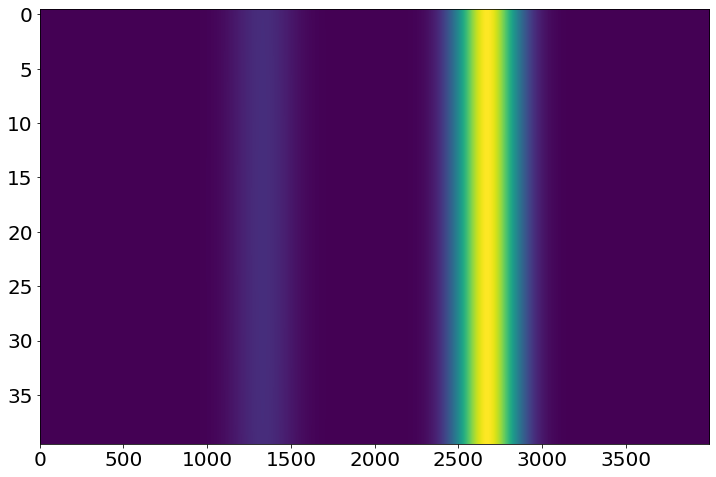

In [29]:
plt.imshow(np.abs(U2_xyz[:,:,0,Mj])**1+np.abs(U1_xyz[:,:,0,Mj])**1, aspect='auto')

1330

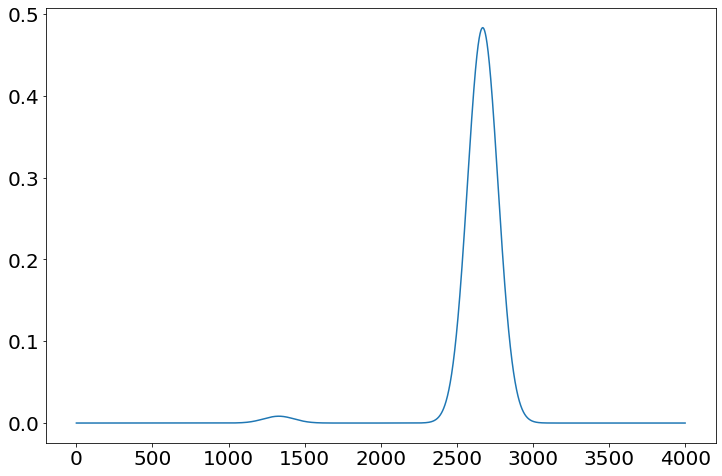

In [30]:

wj1=np.abs(U1_xyz[20,:,0,Mj])**2
wj2=np.abs(U2_xyz[20,:,0,Mj])**2
plt.plot(wj1+wj2)
np.argmax(wj1)


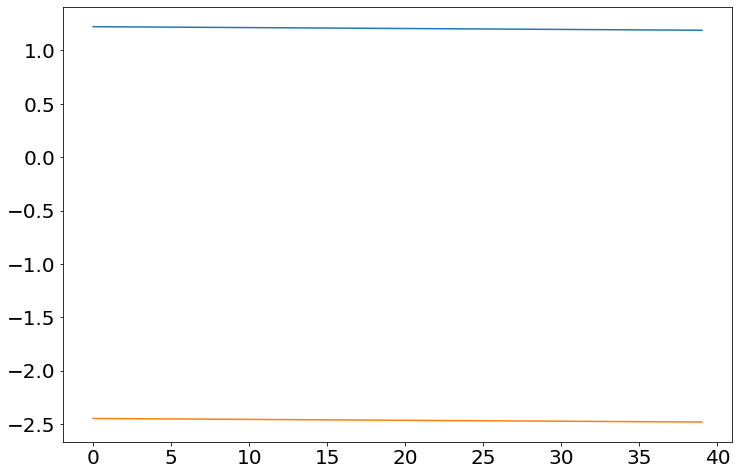

In [31]:
ang1=np.unwrap(np.angle(U1_xyz[:,np.argmax(wj1),0,Mj]))
ang2=np.unwrap(np.angle(U2_xyz[:,np.argmax(wj2),0,Mj]))
plt.plot(ang1)
plt.plot(ang2)

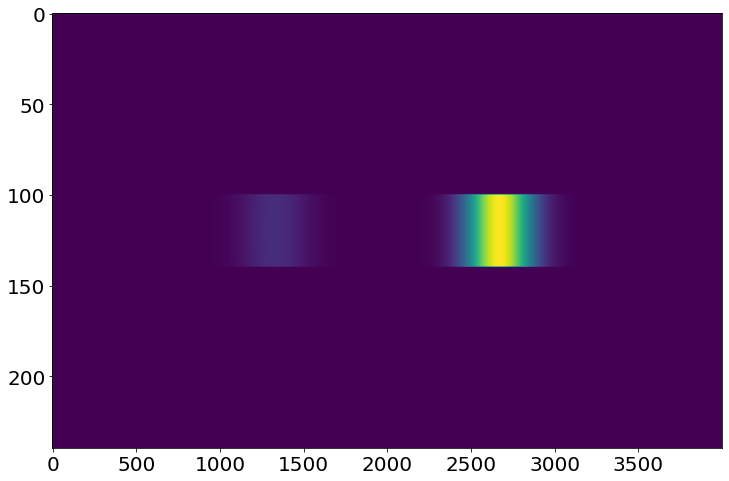

In [32]:
pad_shape = [(100,100), (0,0), (0,0), (0,0)]
utt1 = np.pad(U1_xyz, pad_shape, mode='constant', constant_values=(0.0 + 1j * 0.0, 0.0 + 1j * 0.0))
utt2= np.pad(U2_xyz, pad_shape, mode='constant', constant_values=(0.0 + 1j * 0.0, 0.0 + 1j * 0.0))
plt.imshow(np.abs(utt1[:,:,0,Mj])+np.abs(utt2[:,:,0,Mj]), aspect='auto')

In [33]:
U2_txyz = np.fft.fftshift(np.fft.ifft(utt1[:,:,0,Mj]+utt2[:,:,0,Mj], axis=0), axes=0)

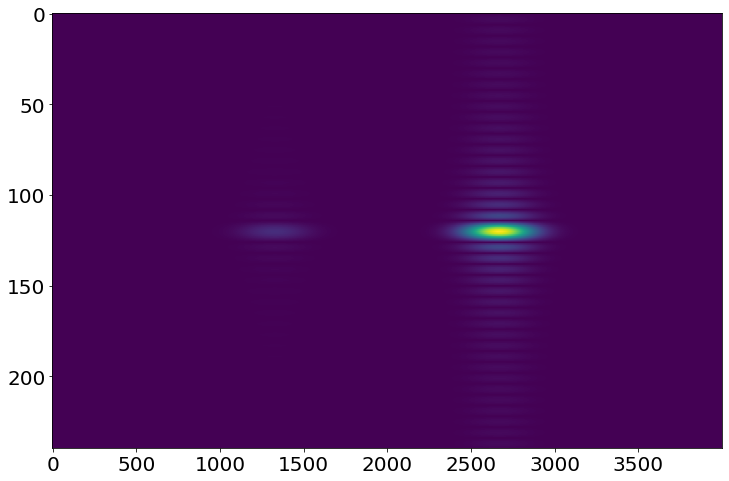

In [34]:
plt.imshow(np.abs(U2_txyz[:,:]), aspect='auto')

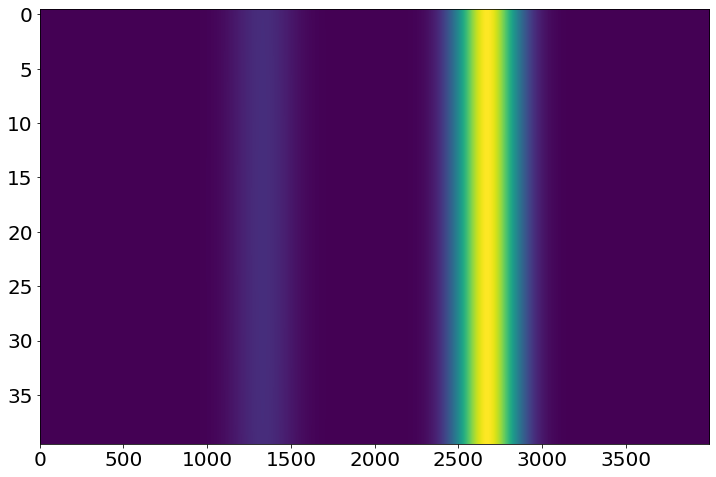

In [35]:
plt.imshow(np.abs(U2_xyz[:,:,0,Mj])+np.abs(U1_xyz[:,:,0,Mj]), aspect='auto')

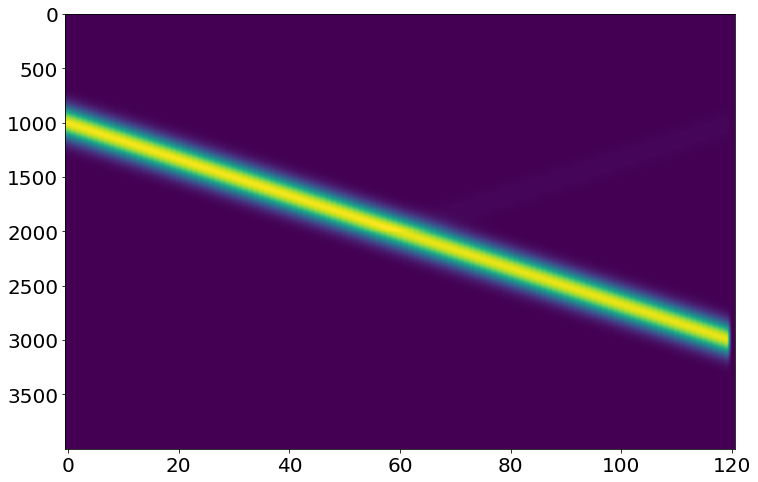

In [36]:
plt.imshow(np.abs(U1_xyz[4,:,0,:])**2+np.abs(U2_xyz[4,:,0,:] )**2, aspect='auto')

In [37]:
# for i in range(0, Npoints):
#     plt.figure()
#     plt.imshow(np.abs(data[i])[:,5,:], aspect='auto')
#     plt.colorbar()

In [38]:
#for i in range(0, Npoints):
#   Rs[i], Ts[i] = single_realization(delta_theta, omegas[i])

In [39]:
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20

In [40]:
XOPfile = 'Si4009keVThickness50um'
XOPdata = np.loadtxt(XOPfile)

Text(0, 0.5, 'R')

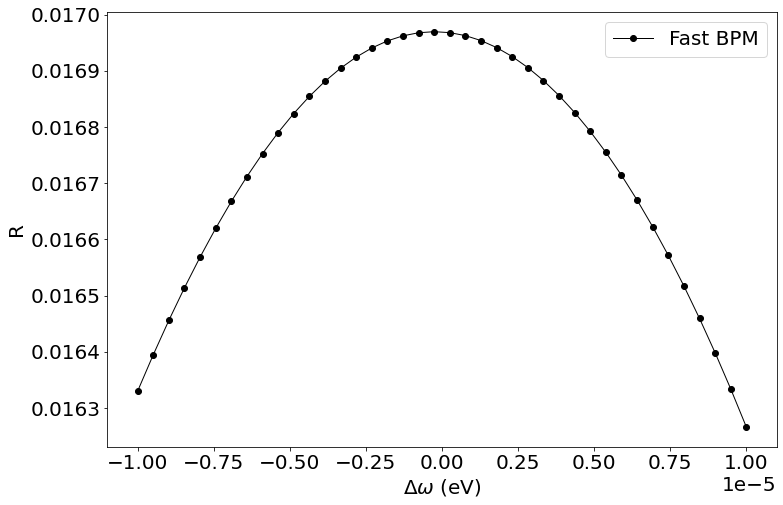

In [41]:
alphaB = 0.5320738025797507
dw = XOPdata[:,0]*4.848137 * 1e-6 * omega0 / np.tan(alphaB)

#plt.plot(dw, XOPdata[:,1], '-', linewidth=2.1, color='red', label='XOP')
plt.plot((omegas - omega0)/omega0, Rs, 'o-', linewidth=1.0, color='black', label='Fast BPM')

plt.legend()
plt.xlabel(r'$\Delta \omega$ (eV)')
plt.ylabel('R')

In [42]:
2+2

4

In [43]:
xcr = XCrystal(XCr_path+'/config/C400_TD_9p8keV_ThermalBump3.yaml', omega0)

In [44]:
xcr.Z/xcr.convr

1.6676769489881618e-07

In [45]:
(xcr.xx[1]-xcr.xx[2])/xcr.convr

-1.0002500625156147e-07

In [46]:
xcr.HH/xcr.convr

5e-07